# Covid-19 in India - Exploratory Data Analysis

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.In this project I will be taking a dataset of Covid-19 stats in India and analyze it ,ask different questions and try to infer vital things through statistics and DataVisualisation methods.

# What is Corona Virus?

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.
Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis.



# How is spreads?

The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.
You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

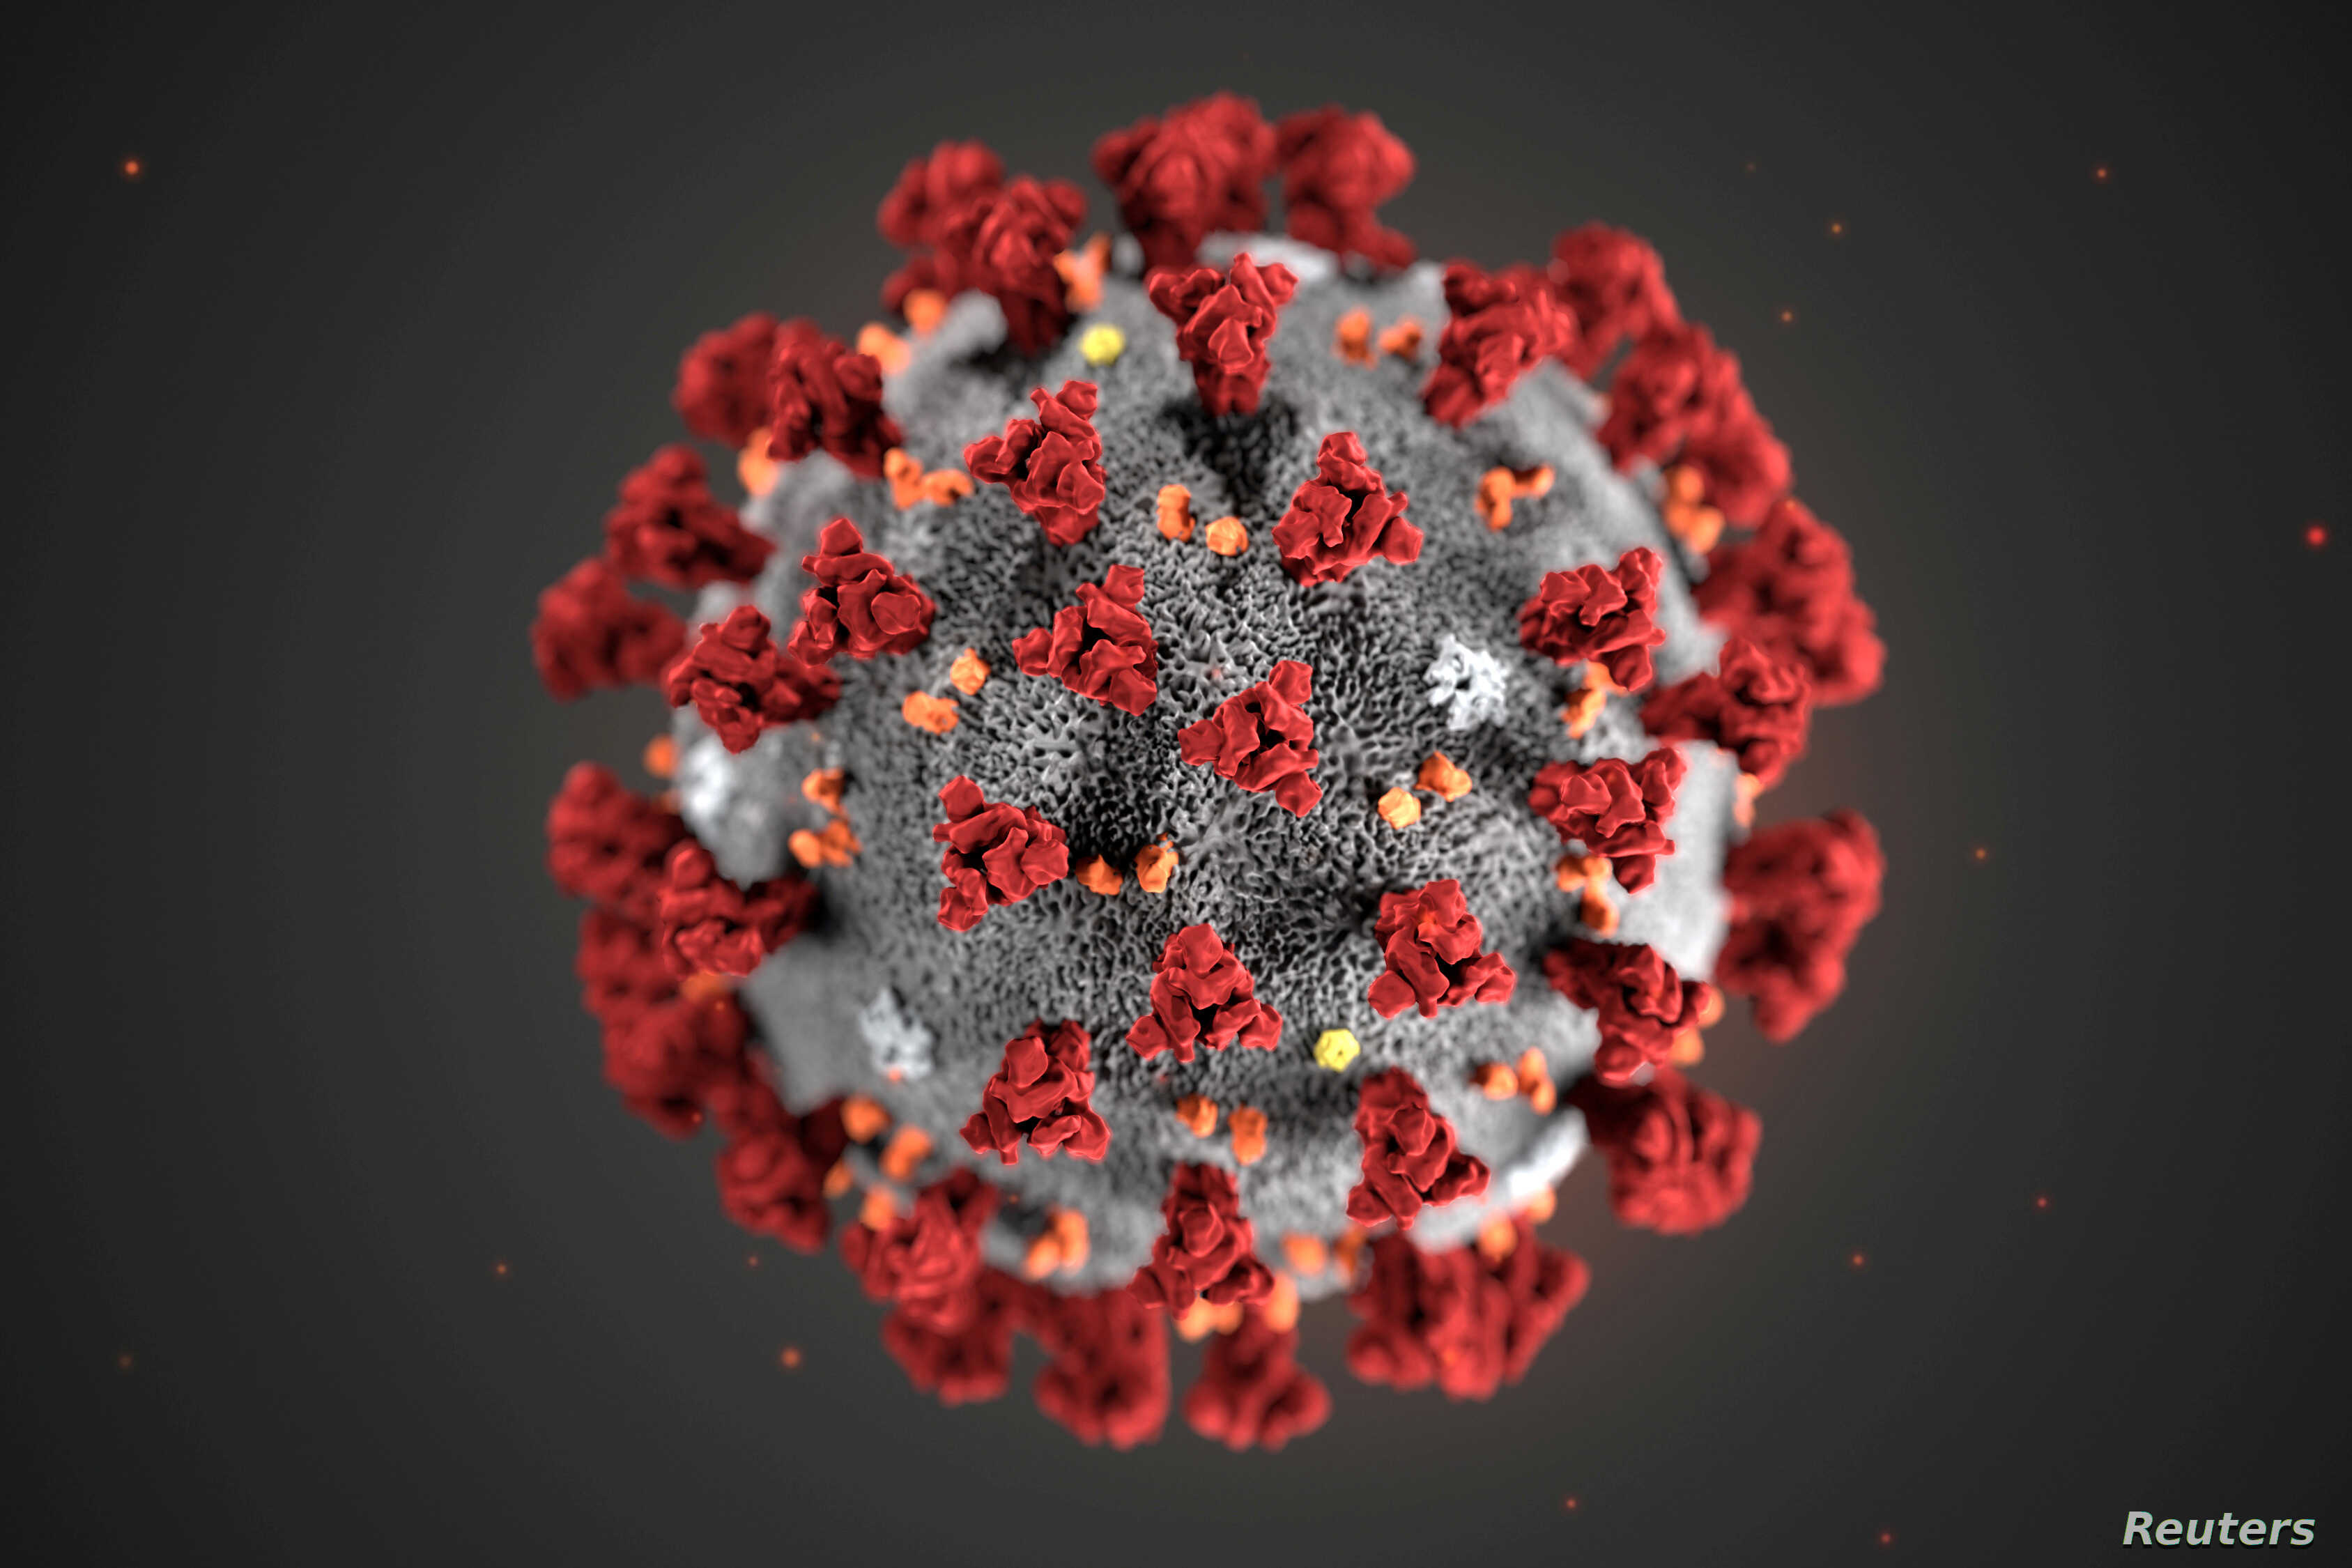

# Symptoms

Most common symptoms:
- Fever
- Dry cough
- Tiredness

Less common symptoms:
- Aches, pains
- Sore throat
- Diarrhoea
- Conjunctivitis
- Headache
- Loss of taste ,smell
- Rash on skin, discolouration of fingers/toes

Serious symptoms:
- Difficulty breathing ,shortness of breath
- Chest pain , pressure
- Loss of speech ,movement

# Lets start by downloading datasets and importing required libraries

# Downloading Dataset and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

In [2]:
covid_df = pd.read_csv('covid_19_india.csv')

In [3]:
covid_df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [4]:
covid_df.shape

(16850, 9)

So , in our dataset we have 16850 rows and 9 columns

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


This gives us basic information about our data in terms of rows,columns and datatypes

In [6]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,16850.000000,1.685000e+04,16850.000000,1.685000e+04
mean,8425.500000,2.360353e+05,3485.222552,2.583667e+05
std,4864.320353,5.225438e+05,9330.541749,5.672808e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4213.250000,2.658500e+03,22.000000,3.644750e+03
50%,8425.500000,2.889500e+04,453.000000,3.336150e+04
75%,12637.750000,2.537510e+05,3071.250000,2.666530e+05
max,16850.000000,5.872268e+06,123531.000000,6.113335e+06


We can view the statistical information about our attributes here

In [7]:
covid_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

We can check column names here

In [8]:
covid_df.isna().any()

Sno                         False
Date                        False
Time                        False
State/UnionTerritory        False
ConfirmedIndianNational     False
ConfirmedForeignNational    False
Cured                       False
Deaths                      False
Confirmed                   False
dtype: bool

By using above command we made sure that there are no NAN values in our given dataset

In [9]:
covid_df.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace=True, axis=1)


We are dropping those two columns as there is not much information we can infer frorm them

In [10]:
covid_df

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818


In [11]:
covid_df.rename(columns = {'State/UnionTerritory':'States'}, inplace = True)

In [12]:
covid_df

,Sno,Date,Time,States,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818


In [13]:
covid_df.set_index("Sno")

,Date,Time,States,Cured,Deaths,Confirmed
Sno,,,,,,
1,2020-01-30,6:00 PM,Kerala,0,0,1
2,2020-01-31,6:00 PM,Kerala,0,0,1
3,2020-02-01,6:00 PM,Kerala,0,0,2
4,2020-02-02,6:00 PM,Kerala,0,0,3
5,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
16846,2021-07-07,8:00 AM,Telangana,613124,3703,628282
16847,2021-07-07,8:00 AM,Tripura,63964,701,68612
16848,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882


In [14]:
covid_df['Date'] = pd.to_datetime(covid_df.Date)

In [15]:
covid_df['year'] = pd.DatetimeIndex(covid_df.Date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.Date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.Date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.Date).weekday

In [16]:
covid_df

,Sno,Date,Time,States,Cured,Deaths,Confirmed,year,month,day,weekday
0,1,2020-01-30,6:00 PM,Kerala,0,0,1,2020,1,30,3
1,2,2020-01-31,6:00 PM,Kerala,0,0,1,2020,1,31,4
2,3,2020-02-01,6:00 PM,Kerala,0,0,2,2020,2,1,5
3,4,2020-02-02,6:00 PM,Kerala,0,0,3,2020,2,2,6
4,5,2020-02-03,6:00 PM,Kerala,0,0,3,2020,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,613124,3703,628282,2021,7,7,2
16846,16847,2021-07-07,8:00 AM,Tripura,63964,701,68612,2021,7,7,2
16847,16848,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882,2021,7,7,2
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2021,7,7,2


In [17]:
covid_df["States"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [18]:
drop= covid_df['States']=='Unassigned'
covid_df.drop(covid_df[drop].index,inplace=True)
drop = covid_df['States']=='Cases being reassigned to states'
covid_df.drop(covid_df[drop].index,inplace=True)

In [19]:
covid_df_statewise = covid_df.groupby("States")[['Date','Cured','Deaths','Confirmed']].sum()

In [20]:
covid_df_statewise.sort_values("Deaths", ascending= False).head(10)

,Cured,Deaths,Confirmed
States,,,
Maharashtra,813788907,19314532,908892470
Karnataka,345648926,4819018,387597335
Tamil Nadu,317067499,4731627,342829697
Delhi,224062704,4066907,236972842
Uttar Pradesh,232529439,3347656,252843682
West Bengal,195296839,3214840,209822848
Andhra Pradesh,303427899,2475816,324146783
Punjab,71108712,2216735,78999515
Gujarat,103995131,1866811,114557615


In [21]:
import jovian

In [22]:
jovian.commit(project='Final project')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "guruc145/final-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/guruc145/final-project


'https://jovian.ai/guruc145/final-project'

# Exploratory Analysis and Data Visualization

In [23]:
high_cases = covid_df_statewise.sort_values("Deaths", ascending= False).head(10)

In [24]:
high_cases

,Cured,Deaths,Confirmed
States,,,
Maharashtra,813788907,19314532,908892470
Karnataka,345648926,4819018,387597335
Tamil Nadu,317067499,4731627,342829697
Delhi,224062704,4066907,236972842
Uttar Pradesh,232529439,3347656,252843682
West Bengal,195296839,3214840,209822848
Andhra Pradesh,303427899,2475816,324146783
Punjab,71108712,2216735,78999515
Gujarat,103995131,1866811,114557615


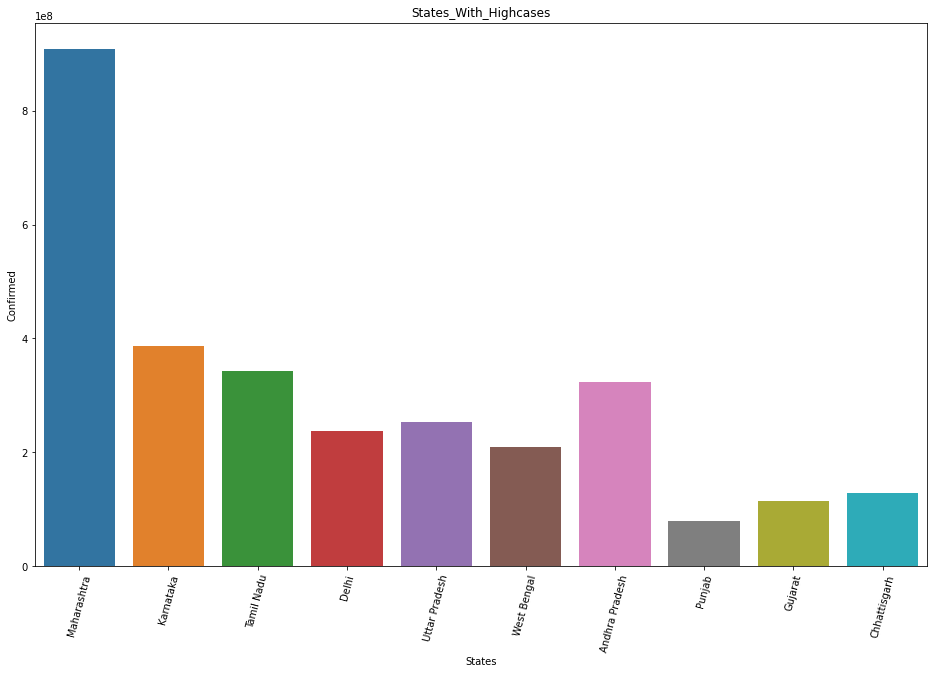

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=75)
plt.title("States_With_Highcases")
sns.barplot(x=high_cases.index, y=high_cases.Confirmed);

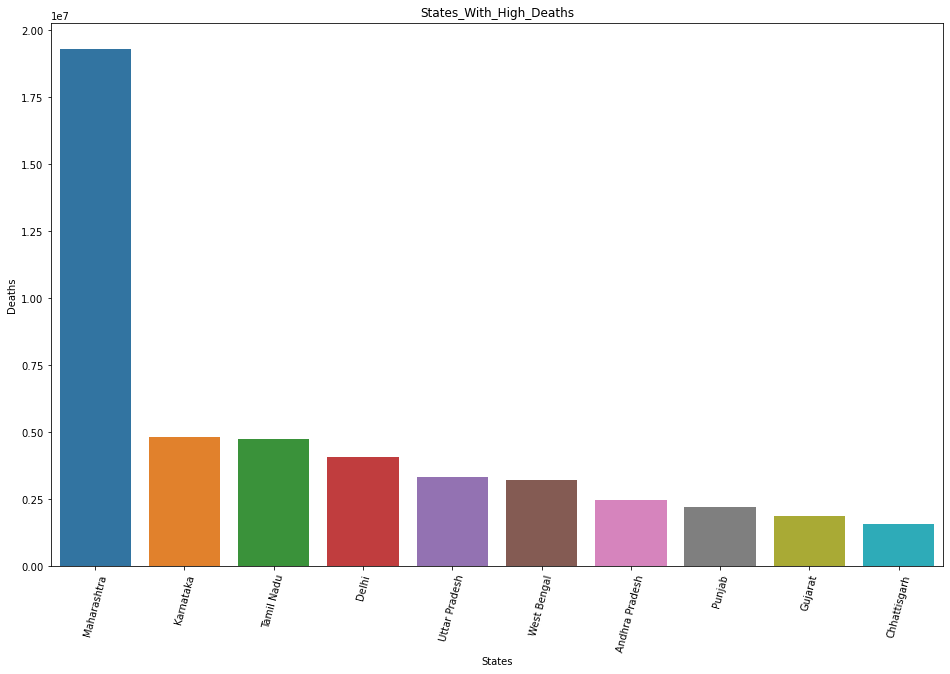

In [42]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=75)
plt.title("States_With_High_Deaths")
sns.barplot(x=high_cases.index, y=high_cases.Deaths);

From these 2 figures we can clearly conclude that Maharashtra has been the worst hit state of pandemic, recording humongous number of Confirmed cases and deaths

In [47]:
day_wise_count = covid_df.groupby("weekday")[["Confirmed","Deaths","Cured"]].sum()

In [48]:
day_wise_count

,Confirmed,Deaths,Cured
weekday,,,
0,626515819,8447800,572339316
1,630388791,8499965,576725928
2,634710941,8559975,581005853
3,608566154,8217023,555391445
4,613100943,8274842,559596627
5,617662426,8334502,563883624
6,622187274,8391893,568251343


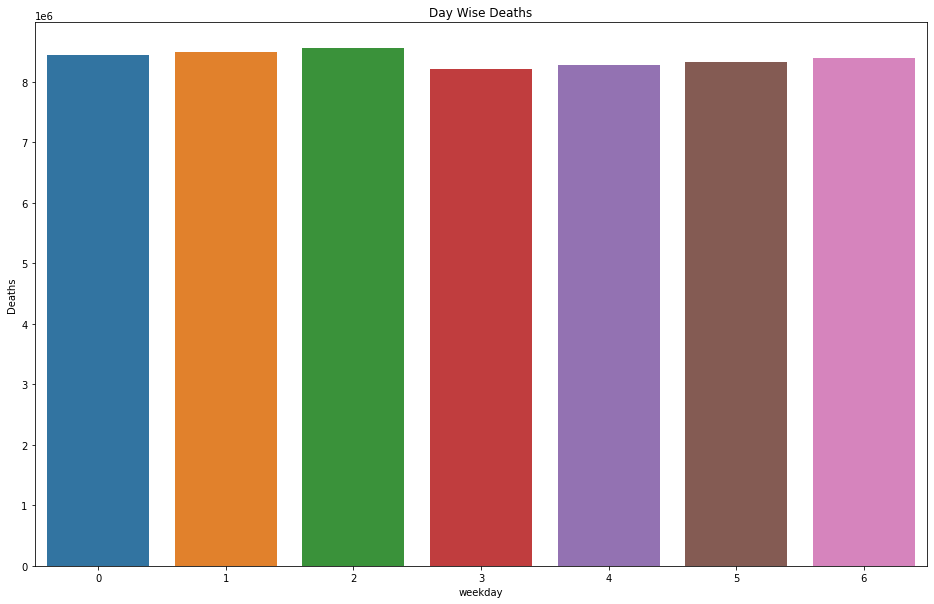

In [75]:
plt.figure(figsize=(16,10))

plt.title("Day Wise Deaths")
sns.barplot(x=day_wise_count.index, y=day_wise_count.Deaths);

From this we can see that there are almost same number of deaths recorded irrespective of what day it is.

In [52]:
year_count = covid_df.groupby("year")[["Confirmed","Deaths","Cured"]].sum()

In [53]:
year_count

,Confirmed,Deaths,Cured
year,,,
2020,1073677055,17022508,941314195
2021,3279455293,41703492,3035879941


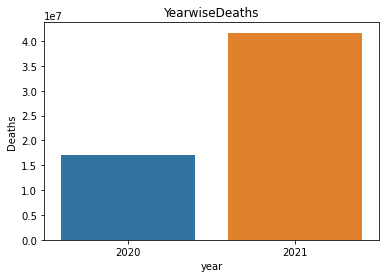

In [68]:
plt.title("YearwiseDeaths")
sns.barplot(x=year_count.index, y=year_count.Deaths);

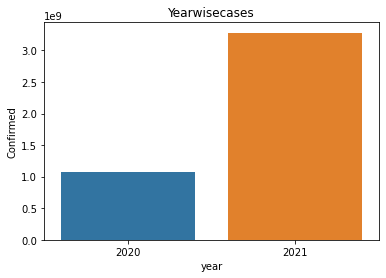

In [67]:
plt.title("Yearwisecases")
sns.barplot(x=year_count.index, y=year_count.Confirmed);

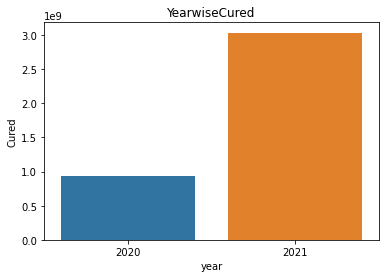

In [69]:
plt.title("YearwiseCured")
sns.barplot(x=year_count.index, y=year_count.Cured);

From the above three barcharts we can clearly see that 2ndwave of pandemic  had the worst impact when compared to first wave and it is an alarming bell that we have to be more cautious and prepared for third wave

# Asking and Answering questions

### 1.What is total number of deaths reported?

In [78]:
Total_deaths = covid_df.Deaths.sum()

In [80]:
print("The total number of deaths are {}".format(Total_deaths))

The total number of deaths are 58726000


### 2.Which state has reported least number of cases?
 

In [81]:
Least_cases = covid_df.groupby("States")[["Cured","Deaths","Confirmed"]].sum()

In [82]:
Least_cases

,Cured,Deaths,Confirmed
States,,,
Andaman and Nicobar Islands,1589935,22624,1675248
Andhra Pradesh,303427899,2475816,324146783
Arunachal Pradesh,5150519,19303,5598324
Assam,74011348,459575,80418492
Bihar,100131380,756282,106881540
Bihar****,1402468,18881,1430909
Chandigarh,7980284,119356,8691806
Chhattisgarh,117163544,1591126,128751782
Dadra and Nagar Haveli,20352,8,20722


In [83]:
 State_with_least_cases = Least_cases.sort_values("Confirmed" ,ascending=True).head(1)

In [84]:
State_with_least_cases 

,Cured,Deaths,Confirmed
States,,,
Daman & Diu,0,0,2


So,Diu and Daman has reported least number of cases

### 3.Which weekday has reported highest number of cases?

In [86]:
day_wise_count = covid_df.groupby("weekday")[["Confirmed","Deaths","Cured"]].sum().head(1)

In [87]:
day_wise_count

,Confirmed,Deaths,Cured
weekday,,,
0,626515819,8447800,572339316


Monday has reported highest number of cases which means that most of these tests might have happened on sunday

### 4.What is the Recovery rate of Covid_19 cases in india?


In [92]:
Recovery_rate = (covid_df.Cured.sum()/covid_df.Confirmed.sum())*100

In [94]:
Recovery_rate

91.3639608919145

In [96]:
print("The overall recovery rate is {:.2f}%in India".format(Recovery_rate))

The overall recovery rate is 91.36%in India


### 5.How many confirmed cases are reported in Kerala on Sundays?

In [99]:
Kerala = covid_df[covid_df.States == "Kerala"]

In [106]:
Kerala_sunday_cases = Kerala[Kerala.weekday==0].Confirmed.sum()

In [107]:
Kerala_sunday_cases

49669831

In [110]:
print("The total confirmed cases in Kerala on Sundays are {}".format(Kerala_sunday_cases))

The total confirmed cases in Kerala on Sundays are 49669831


# Inferences and Conclusions

- Maharashtra is the worst hit state of the pandemic and Diu daman UT has least affect of this Covid Virus

- Overall positive rate is something we should be happy about as almost 91 people out of every 100 are recovering out of this

- Total cases and deaths are much higher in 2nd wave when compared to 1st wave which tells us about the importance of strict norms that have to be taken care of in order to get out of this

- In order to stop next outbreak of COVID-19, the best and most urgent steps must be taken to overcome this coronavirus epidemic. The fight against coronavirus infection should be an emergency.